# Aprendizaje Supervisado: Regresión


![](https://miro.medium.com/max/1200/1*30iVWEHg7rRJQ03yMBXNaA.gif)


***Agradecimientos:***
- Dataset: UCI Machine Learning Repository
- Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg


Los datos se refieren al consumo de combustible del ciclo de la ciudad en millas por galón.
El conjunto de datos se utilizó en la American Statistical Association Exposition de 1983.

- Número de instancias: 398

- Número de atributos: 9

- Información de atributos:
    - mpg (millas por galón): continuous --> TARGET
    - cylinders (N° cilindros): discrete
    - displacement (desplazamiento): continuous
    - horsepower (caballo de fuerza): continuous
    - weight (peso): continuous
    - acceleration (aceleración): continuous
    - model year (model): discrete
    - origin (origen): discrete
    - car name (nombre del auto): string (unique for each instance)

In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from io import StringIO

## Carga de datos

In [ ]:
# Dirección de descarga
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Obtener datos desde la url
response = requests.get(url)

# Cambiar tabulación (\t) por un espacio
string = response.text.replace("\t"," ")

# Para cargar esta cadena de texto como un archivo, podemos usar StringIO integrado en Python
file = StringIO(string)
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model year', 'origin', 'car name']

data_mpgAutos = pd.read_csv(file, sep="\s+", header=None, names=column_names)

# Veamos las primeras 5 filas del dataframe
data_mpgAutos.head()

In [ ]:
data_mpgAutos.info()

## Funciones

In [ ]:
def metricas_de_modelos(y_train, y_pred_train, y_test, y_pred):
    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred)
    print('\nMétricas del Modelo de Regresión Lineal')
    print(f"R2 train: {R2_train:.4f}")
    print(f"R2 test: {R2_test:.4f}")
    print(f"RMSE train: {RMSE_train:.2f}")
    print(f"RMSE test: {RMSE_test:.2f}")
    print(f"MAE train: {MAE_train:.2f}")
    print(f"MAE test: {MAE_test:.2f}")

## Inspección de datos faltantes

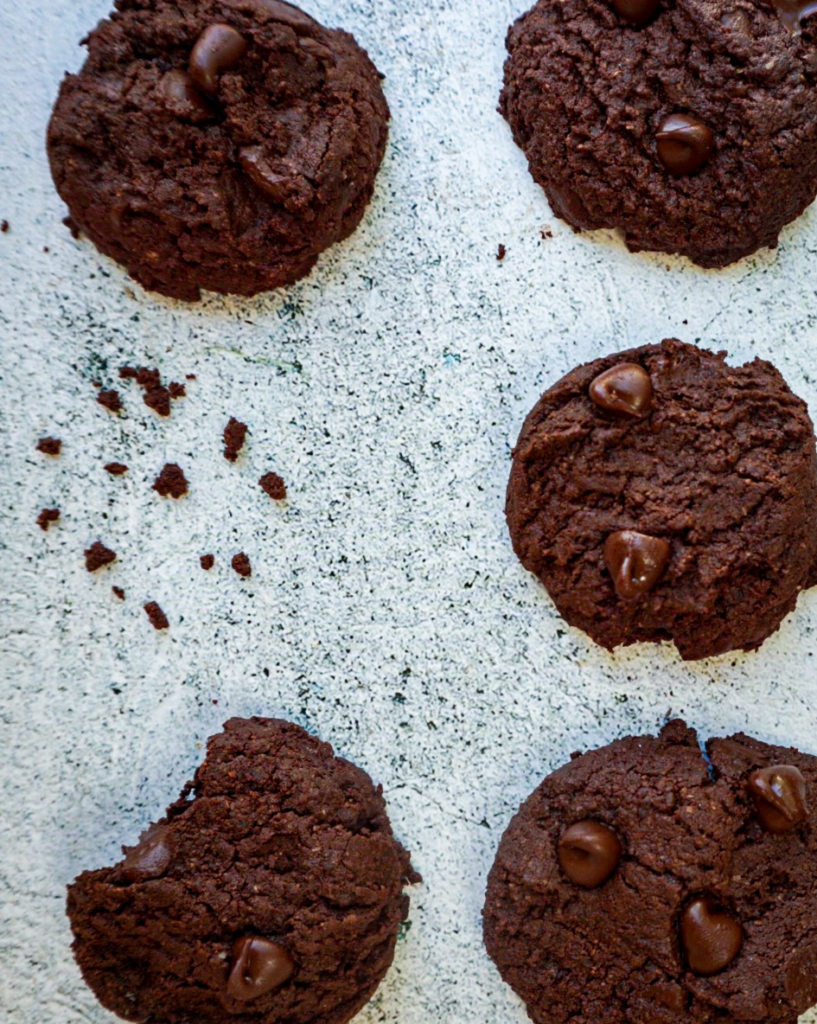

In [ ]:
data_mpgAutos['horsepower'] = pd.to_numeric(data_mpgAutos['horsepower'], errors='coerce')
data_mpgAutos.info()

In [ ]:
data_mpgAutos.isnull().sum()

In [ ]:
data_mpgAutos.describe()

In [ ]:
data_mpgAutos[data_mpgAutos['horsepower'].isnull()]

In [ ]:
data_mpgAutos[data_mpgAutos['car name']=='ford maverick']

In [ ]:
data_mpgAutos[data_mpgAutos['cylinders']==4].describe()

In [ ]:
data_mpgAutos[data_mpgAutos['cylinders']==6].describe()

## Imputación de datos faltantes

In [ ]:
mean_4cyl = round(data_mpgAutos.loc[data_mpgAutos['cylinders']==4, 'horsepower'].mean(), 0)
mean_4cyl

In [ ]:
mask = (data_mpgAutos['horsepower'].isnull()) & (data_mpgAutos['cylinders']==4)
data_mpgAutos.loc[mask] 

In [ ]:
data_mpgAutos.loc[mask, 'horsepower']

In [ ]:
data_mpgAutos.loc[mask, 'horsepower'] = mean_4cyl

In [ ]:
data_mpgAutos.loc[mask, 'horsepower']

In [ ]:
mean_6cyl = round(data_mpgAutos.loc[data_mpgAutos['cylinders']==6, 'horsepower'].mean(), 0)
mask = (data_mpgAutos['horsepower'].isnull()) & (data_mpgAutos['cylinders']==6)
data_mpgAutos.loc[mask, 'horsepower'] = mean_6cyl

# Inspección de los datos para corroborar la imputación de datos faltantes
data_mpgAutos.loc[mask, 'horsepower']

In [ ]:
# Verificamos que no hay datos faltantes
data_mpgAutos.isnull().sum()

In [ ]:
# Inspeccionamos la variable 'origin'
data_mpgAutos['origin'].astype('category').describe()

In [ ]:
# Estadísticas descriptivas de las variables
data_mpgAutos.describe()

### EDA: Correlación de Pearson

In [ ]:
corr = data_mpgAutos.drop(columns=['car name', 'origin']).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, annot=True, mask=mask, square=True, cmap='viridis')

In [ ]:
# Análicemos las millas por galón por origen
data_mpgAutos.groupby(['origin'])['mpg'].describe()

## Feature Engineering

In [ ]:
# Transformación de variables categóricas
X_dummy = pd.get_dummies(data_mpgAutos['origin'], drop_first=True)
X_dummy

## Modelado de datos

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree

# Semilla para inicializar el generador de números aleatorios
seed = 28

### Datos de entrenamiento y prueba

In [ ]:
# Data de regresores
# Eliminar column 'origin' (la tenemos como variables ficticias)
X = data_mpgAutos.drop(columns=['mpg', 'car name', 'origin'])

X = pd.concat([X, X_dummy.add_prefix('origin_')], axis=1)

# Data de variable target o regresora
y = data_mpgAutos['mpg']

In [ ]:
# Division datasets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

# Dimensiones de los dataframes de train y test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Modelo de Regresión Lineal (Baseline)

In [ ]:
# Instanciar el modelo de Regresión Lineal
model = LinearRegression()

# Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones a partir de los datos entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Gráfico de comparación datos de target real vs predicciones
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, '*')
ax.set_title('Consumo de Combustible en Millas/galón\nValores reales vs predichos (Test)')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
# Borrar bordes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axline((0, 0), slope=1, ls='--', color='r')
plt.show()

# Calculo de Métricas de entrenamiento y test
metricas_de_modelos(y_train, y_pred_train, y_test, y_pred)

In [ ]:
# Veamos los coeficientes del modelo
cols = X_train.columns  
fig, ax = plt.subplots()
ax.barh(cols, model.coef_)
ax.set_title('Coeficientes del Modelo')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(ls='--')
plt.show()

# Intercepción y coeficientes del modelo
print(f"\nIntercepción: {model.intercept_:.2f}\n")
round(pd.DataFrame(model.coef_.reshape(1,-1), columns=cols), 3)

### Modelo de Regresión con Árboles de Decisión

In [ ]:
# Instanciar el modelo de Regresión Lineal
model = DecisionTreeRegressor(random_state=seed)

# Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones a partir de los datos entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Gráfico de comparación datos de target real vs predicciones
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, '*')
ax.set_title('Consumo de Combustible en Millas/galón\nValores reales vs predichos (Test)')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
# Quitar bordes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axline((0, 0), slope=1, ls='--', color='r')
plt.show()

# Calculo de Métricas de entrenamiento y test
metricas_de_modelos(y_train, y_pred_train, y_test, y_pred)

<img width="400" align='left' src="https://scalar.usc.edu/works/c2c-digital-magazine-fall-2017--winter-2018/media/BasicPartsofaDecisionTree.jpg" />

![](https://web.cs.wpi.edu/~cs507/f98/classes/class04/fig01.gif)

**Algunos hiperparámetros de Decision Tree Regressor**

- 'criterion' --> La función para medir la calidad de una división (default 'mse')
- 'max_depth'--> La profundidad máxima del árbol
- 'max_features'--> La cantidad de características a considerar al buscar la mejor división
- 'max_leaf_nodes'--> Los mejores nodos se definen como una reducción relativa de la impureza o None para infinito
- 'min_impurity_decrease'--> Un nodo se dividirá si esta división induce una disminución de la impureza mayor o igual a este valor (default 0.0)
- 'min_samples_leaf'--> El número mínimo de muestras necesarias en un nodo hoja (default 1)
- 'min_samples_split'--> El número mínimo de muestras necesarias para dividir un nodo interno (default 2)
- 'random_state' --> Control de la aleatoriedad del estimador
- 'splitter' --> La estrategia utilizada para elegir la división en cada nodo ('best', 'random')
 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# Veamos los hiperparámetros del modelo obtenido arriba
model.get_params()

In [ ]:
# Análicemos los coeficientes del modelo
cols = X_train.columns
fig, ax = plt.subplots()
feature_importances = pd.DataFrame(model.feature_importances_, index=cols).sort_values(0)
feature_importances.plot(kind='barh', legend=False, ax=ax)
ax.set_title('Coeficientes del Modelo')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(ls='--')
plt.show()
round(feature_importances.T, 3)

### Gráfica del Árbol

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
tree.plot_tree(model, max_depth=None, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
tree.plot_tree(model, max_depth=2, ax=ax, feature_names=cols)
plt.show()

## Overfitting - Underfitting - Generalized Error

Su objetivo es encontrar un modelo que se aproxime mejor a una FUNCIÓN. Al entrenar fhat, debes asegurarte de que el ruido se descarta tanto como sea posible. Debería lograrse un error predictivo bajo en el conjuntos de datos nuevos (test.

Puede encontrar dos dificultades al ajustar los datos a la FUNCIÓN. 
- **Sobreajuste (overfitting)**: cuando la FUNCIÓN se adapta al ruido en el conjunto de entrenamiento. Su poder predictivo en conjuntos de datos no vistos es **bastante bajo**. El modelo memoriza el ruido presente en el conjunto de entrenamiento y luego no es capaz de predecir ante valores nuevos. Dicho modelo logra un *error de conjunto de entrenamiento bajo y un error de conjunto de prueba alto*.

    Un error de entrenamiento bajo y un error de generalización alto indica overfitting, el modelo ha aprendido los datos "de memoria", y no es capaz de generalizar para adaptarse a datos nuevos.

- **Desajuste (underfitting)**: cuando la FUNCIÓN no es lo suficientemente flexible para aproximarse al conjunto de entrenamiento. Cuando un modelo no se ajusta a los datos, el error del conjunto de entrenamiento es aproximadamente igual al error del conjunto de prueba. Siendo ambos errores altos. Dicho modelo no es lo suficientemente flexible para capturar la dependencia entre predictores y variable respuesta.

El **error de generalización** de un modelo te dice cuánto generaliza en datos no vistos. Se puede descomponer en 3 términos: 

1. sesgo 
1. varianza y
1. error irreductible, donde el error irreducible es la contribución del ruido al error.


<img align=right src=https://datacated.com/wp-content/uploads/2019/02/1_9hPX9pAO3jqLrzt0IE3JzA.png width="600" height="700"/>

**Sesgo o Bias**: indica, en promedio, cuánto el "y_predicho" y el "y_real" son diferentes. El modelo no es lo suficientemente flexible para aproximarse a la función verdadera. Los modelos de alto sesgo conducen a un desajuste.

**Varianza**: indica cuánta inconsistencia existe entre diferentes conjuntos de entrenamiento. Los modelos de alta variación conducen a un sobreajuste.

La **complejidad de un modelo** establece su flexibilidad para aproximarse a la función verdadera f.

**Bias-Variance Tradeoff**: El siguiente diagrama muestra cómo la *mejor complejidad del modelo* corresponde al *menor error de generalización*. Cuando aumenta la complejidad del modelo, la varianza aumenta mientras que el sesgo disminuye. Por el contrario, cuando la complejidad del modelo disminuye, la varianza disminuye y el sesgo aumenta. El objetivo es encontrar la complejidad del modelo que logre el menor error de generalización. Dado que este error es la suma de los tres términos ya mencionados, y el error irreducible es constante, es necesario encontrar un equilibrio entre el sesgo y la varianza.

Siempre se verá que a medida que uno aumenta, el otro disminuye. Esto se conoce como **compensación de sesgo-varianza**.

<p align="center">
 <img src=https://miro.medium.com/max/2048/0*QPOQrv6TZm6FVMd1.png width="400" height="480">
</p>

https://ars.els-cdn.com/content/image/1-s2.0-S0167739X1500223X-gr11.jpg

## Mejoremos el modelo DecisionTree

Links de referencia:

- [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

In [ ]:
# Instanciar el modelo de Regresión Lineal
model = DecisionTreeRegressor(
                                criterion='mse',     # función para medir la calidad de un split (mse, mae, poisson, friedman_mse)
                                splitter='best',     # La estrategia utilizada para elegir la división en cada nodo (best, random)
                                max_depth=6,         # Máxima profundidad del árbol <---
                                min_samples_split=2,  # Número mínimo de muestra necesarias para dividir un nodo interno (int, float)
                                min_samples_leaf=2,   # Número mínimo de muestras necesarias en un nodo hoja (int, float)  <---
                                min_weight_fraction_leaf=0.0,
                                max_features=None,   
                                random_state=seed,
                                max_leaf_nodes=6,            # Máximo número de nodos hoja <---
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,     # Umbral de parada temprana en el crecimiento de los árboles
                                ccp_alpha=0.0,                 # Poda de complejidad de costo mínimo
                             )

# Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones a partir de los datos entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Gráfico de comparación datos de target real vs predicciones
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, '*')
ax.set_title('Consumo de Combustible en Millas/galón\nValores reales vs predichos (Test)')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
# Borrar bordes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axline((0, 0), slope=1, ls='--', color='r')
plt.show()

# Calculo de Métricas de entrenamiento y test
metricas_de_modelos(y_train, y_pred_train, y_test, y_pred)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
tree.plot_tree(model, max_depth=None, ax=ax, feature_names=cols)
plt.show()

In [ ]:
# Instanciar el modelo de Regresión Lineal
model = DecisionTreeRegressor(
                                criterion='mse',
                                splitter='best',
                                max_depth=6,
                                min_samples_split=2,
                                min_samples_leaf=2,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=seed,
                                max_leaf_nodes=10,  # <---
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                ccp_alpha=0.0,
                             )

# Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones a partir de los datos entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Gráfico de comparación datos de target real vs predicciones
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, '*')
ax.set_title('Consumo de Combustible en Millas/galón\nValores reales vs predichos (Test)')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
# Borrar bordes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axline((0, 0), slope=1, ls='--', color='r')
plt.show()

# Calculo de Métricas de entrenamiento y test
metricas_de_modelos(y_train, y_pred_train, y_test, y_pred)

## Para ver en casita...

### Una prueba más...

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
tree.plot_tree(model, max_depth=None, ax=ax, feature_names=cols)
plt.show()

In [ ]:
# Instanciar el modelo de Regresión Lineal
model = DecisionTreeRegressor(
                                criterion='mse',
                                splitter='best',
                                max_depth=6,
                                min_samples_split=3,
                                min_samples_leaf=2,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=seed,
                                max_leaf_nodes=6,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                ccp_alpha=0.0,
                             )

# Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones a partir de los datos entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Gráfico de comparación datos de target real vs predicciones
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, '*')
ax.set_title('Consumo de Combustible en Millas/galón\nValores reales vs predichos (Test)')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
# Borrar bordes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axline((0, 0), slope=1, ls='--', color='r')
plt.show()

# Calculo de Métricas de entrenamiento y test
metricas_de_modelos(y_train, y_pred_train, y_test, y_pred)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
tree.plot_tree(model, max_depth=None, ax=ax, feature_names=cols)
plt.show()

### ...Una pruebita más!

In [ ]:
# Instanciar el modelo de Regresión Lineal
model = DecisionTreeRegressor(
                                criterion='mse',
                                splitter='best',
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=2,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=seed,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                ccp_alpha=0.3,                 
                             )

# Ajuste del modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones a partir de los datos entrenamiento y test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Gráfico de comparación datos de target real vs predicciones
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, '*')
ax.set_title('Consumo de Combustible en Millas/galón\nValores reales vs predichos (Test)')
ax.set_xlabel('Valores reales')
ax.set_ylabel('Valores predichos')
# Borrar bordes del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axline((0, 0), slope=1, ls='--', color='r')
plt.show()

# Calculo de Métricas de entrenamiento y test
metricas_de_modelos(y_train, y_pred_train, y_test, y_pred)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
tree.plot_tree(model, max_depth=None, ax=ax, feature_names=cols)
plt.show()

## Links relacionados

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

https://machinelearningmastery.com/handle-missing-data-python/

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

https://scikit-learn.org/stable/modules/impute.html

<span style="background-color:black; color:yellow; font-size:1.4em">¡Espero les sea muy útil el material...Gracias!</span>